# **Project Description: Customer Segmentation using K-Means Clustering**

Customer segmentation is a crucial aspect of modern business strategies, allowing companies to better understand their customer base and tailor their marketing efforts accordingly. In this project, I employed K-Means clustering, a popular unsupervised machine learning technique, to segment customers based on their behavior and preferences. By identifying distinct groups of customers, businesses can develop more targeted and effective marketing strategies, ultimately leading to improved customer satisfaction and increased profitability.

The primary objective of this project is to analyze customer data and identify key segments within the customer base. These segments are characterized by specific behaviors, preferences, and demographic information, enabling businesses to create personalized marketing campaigns for each segment.

### **Dataset Description**

The dataset used in this project includes various features related to customer preferences, behaviors, and demographics. Here’s a breakdown of the dataset:

- **yummy**: A binary feature indicating whether the customer finds the product yummy (1 = Yes, 0 = No).
- **convenient**: A binary feature indicating whether the customer finds the product convenient (1 = Yes, 0 = No).
- **spicy**: A binary feature indicating whether the customer finds the product spicy (1 = Yes, 0 = No).
- **fattening**: A binary feature indicating whether the customer finds the product fattening (1 = Yes, 0 = No).
- **greasy**: A binary feature indicating whether the customer finds the product greasy (1 = Yes, 0 = No).
- **fast**: A binary feature indicating whether the customer finds the product fast to consume (1 = Yes, 0 = No).
- **cheap**: A binary feature indicating whether the customer finds the product cheap (1 = Yes, 0 = No).
- **tasty**: A binary feature indicating whether the customer finds the product tasty (1 = Yes, 0 = No).
- **expensive**: A binary feature indicating whether the customer finds the product expensive (1 = Yes, 0 = No).
- **healthy**: A binary feature indicating whether the customer finds the product healthy (1 = Yes, 0 = No).
- **disgusting**: A binary feature indicating whether the customer finds the product disgusting (1 = Yes, 0 = No).
- **Like**: A numeric feature representing the customer’s overall liking of the product on a scale from negative to positive.
- **Age**: The age of the customer.
- **VisitFrequency**: The frequency with which the customer visits or uses the product/service (e.g., "Once a week", "Once a month", etc.).
- **Gender**: The gender of the customer (encoded as 0 = Male, 1 = Female).

### **Analysis and Insights**

By applying K-Means clustering to this dataset, I was able to group customers into distinct segments based on their preferences and demographic information. Each segment reflects a unique set of characteristics that can be used to target specific marketing efforts. For example, one segment may consist of younger customers who find the product tasty and convenient, while another segment may include older customers who value health and dislike the greasiness of the product.

This segmentation allows businesses to:

1. **Personalize Marketing**: Tailor marketing messages to resonate with the preferences of each customer segment.
2. **Product Development**: Adjust product features based on the feedback from different customer segments.
3. **Increase Customer Loyalty**: By understanding and addressing the specific needs and preferences of each segment, businesses can improve customer satisfaction and loyalty.


## **Import Revelant libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds.csv to mcdonalds.csv


## **Load Datasset**

In [ ]:
raw_data = pd.read_csv("mcdonalds.csv")

In [ ]:
raw_data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
df = raw_data.copy()
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


## **Data Cleaning & Data preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
df['Age']

,Age
0,61
1,51
2,62
3,69
4,49
...,...
1448,47
1449,36
1450,52
1451,41


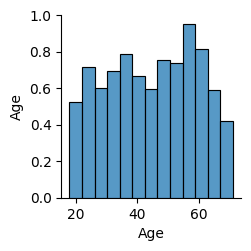

In [ ]:
sns.pairplot(df)

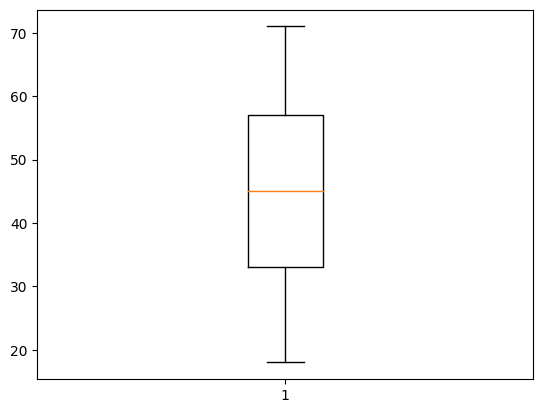

In [ ]:
plt.boxplot(df['Age'])
plt.show()

In [ ]:
# Handling the 'Like' column
df['Like'] = df['Like'].replace({'I love it!+5': 5, 'I hate it!-5': -5})
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

In [ ]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','Gender']

label_encoder = LabelEncoder()

for col in binary_columns:
    df[col] =  label_encoder.fit_transform(df[col])

In [ ]:
scaler = StandardScaler()

# Standardize the numerical columns
numerical_columns = ['Age', 'Like']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the standardized data
print(df.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting      Like       Age      VisitFrequency  Gender  
0        0           0 -1.212225  1.153258  Every three months       0  
1        0           0  0.392515  0.449839  Every three months       0  
2        1           0  0.071567  1.223600  Every three months       0  
3        0           1  1.034411  1.715993         Once a week       0  
4        1           0  0.392515  0.309156        Once a month       1  


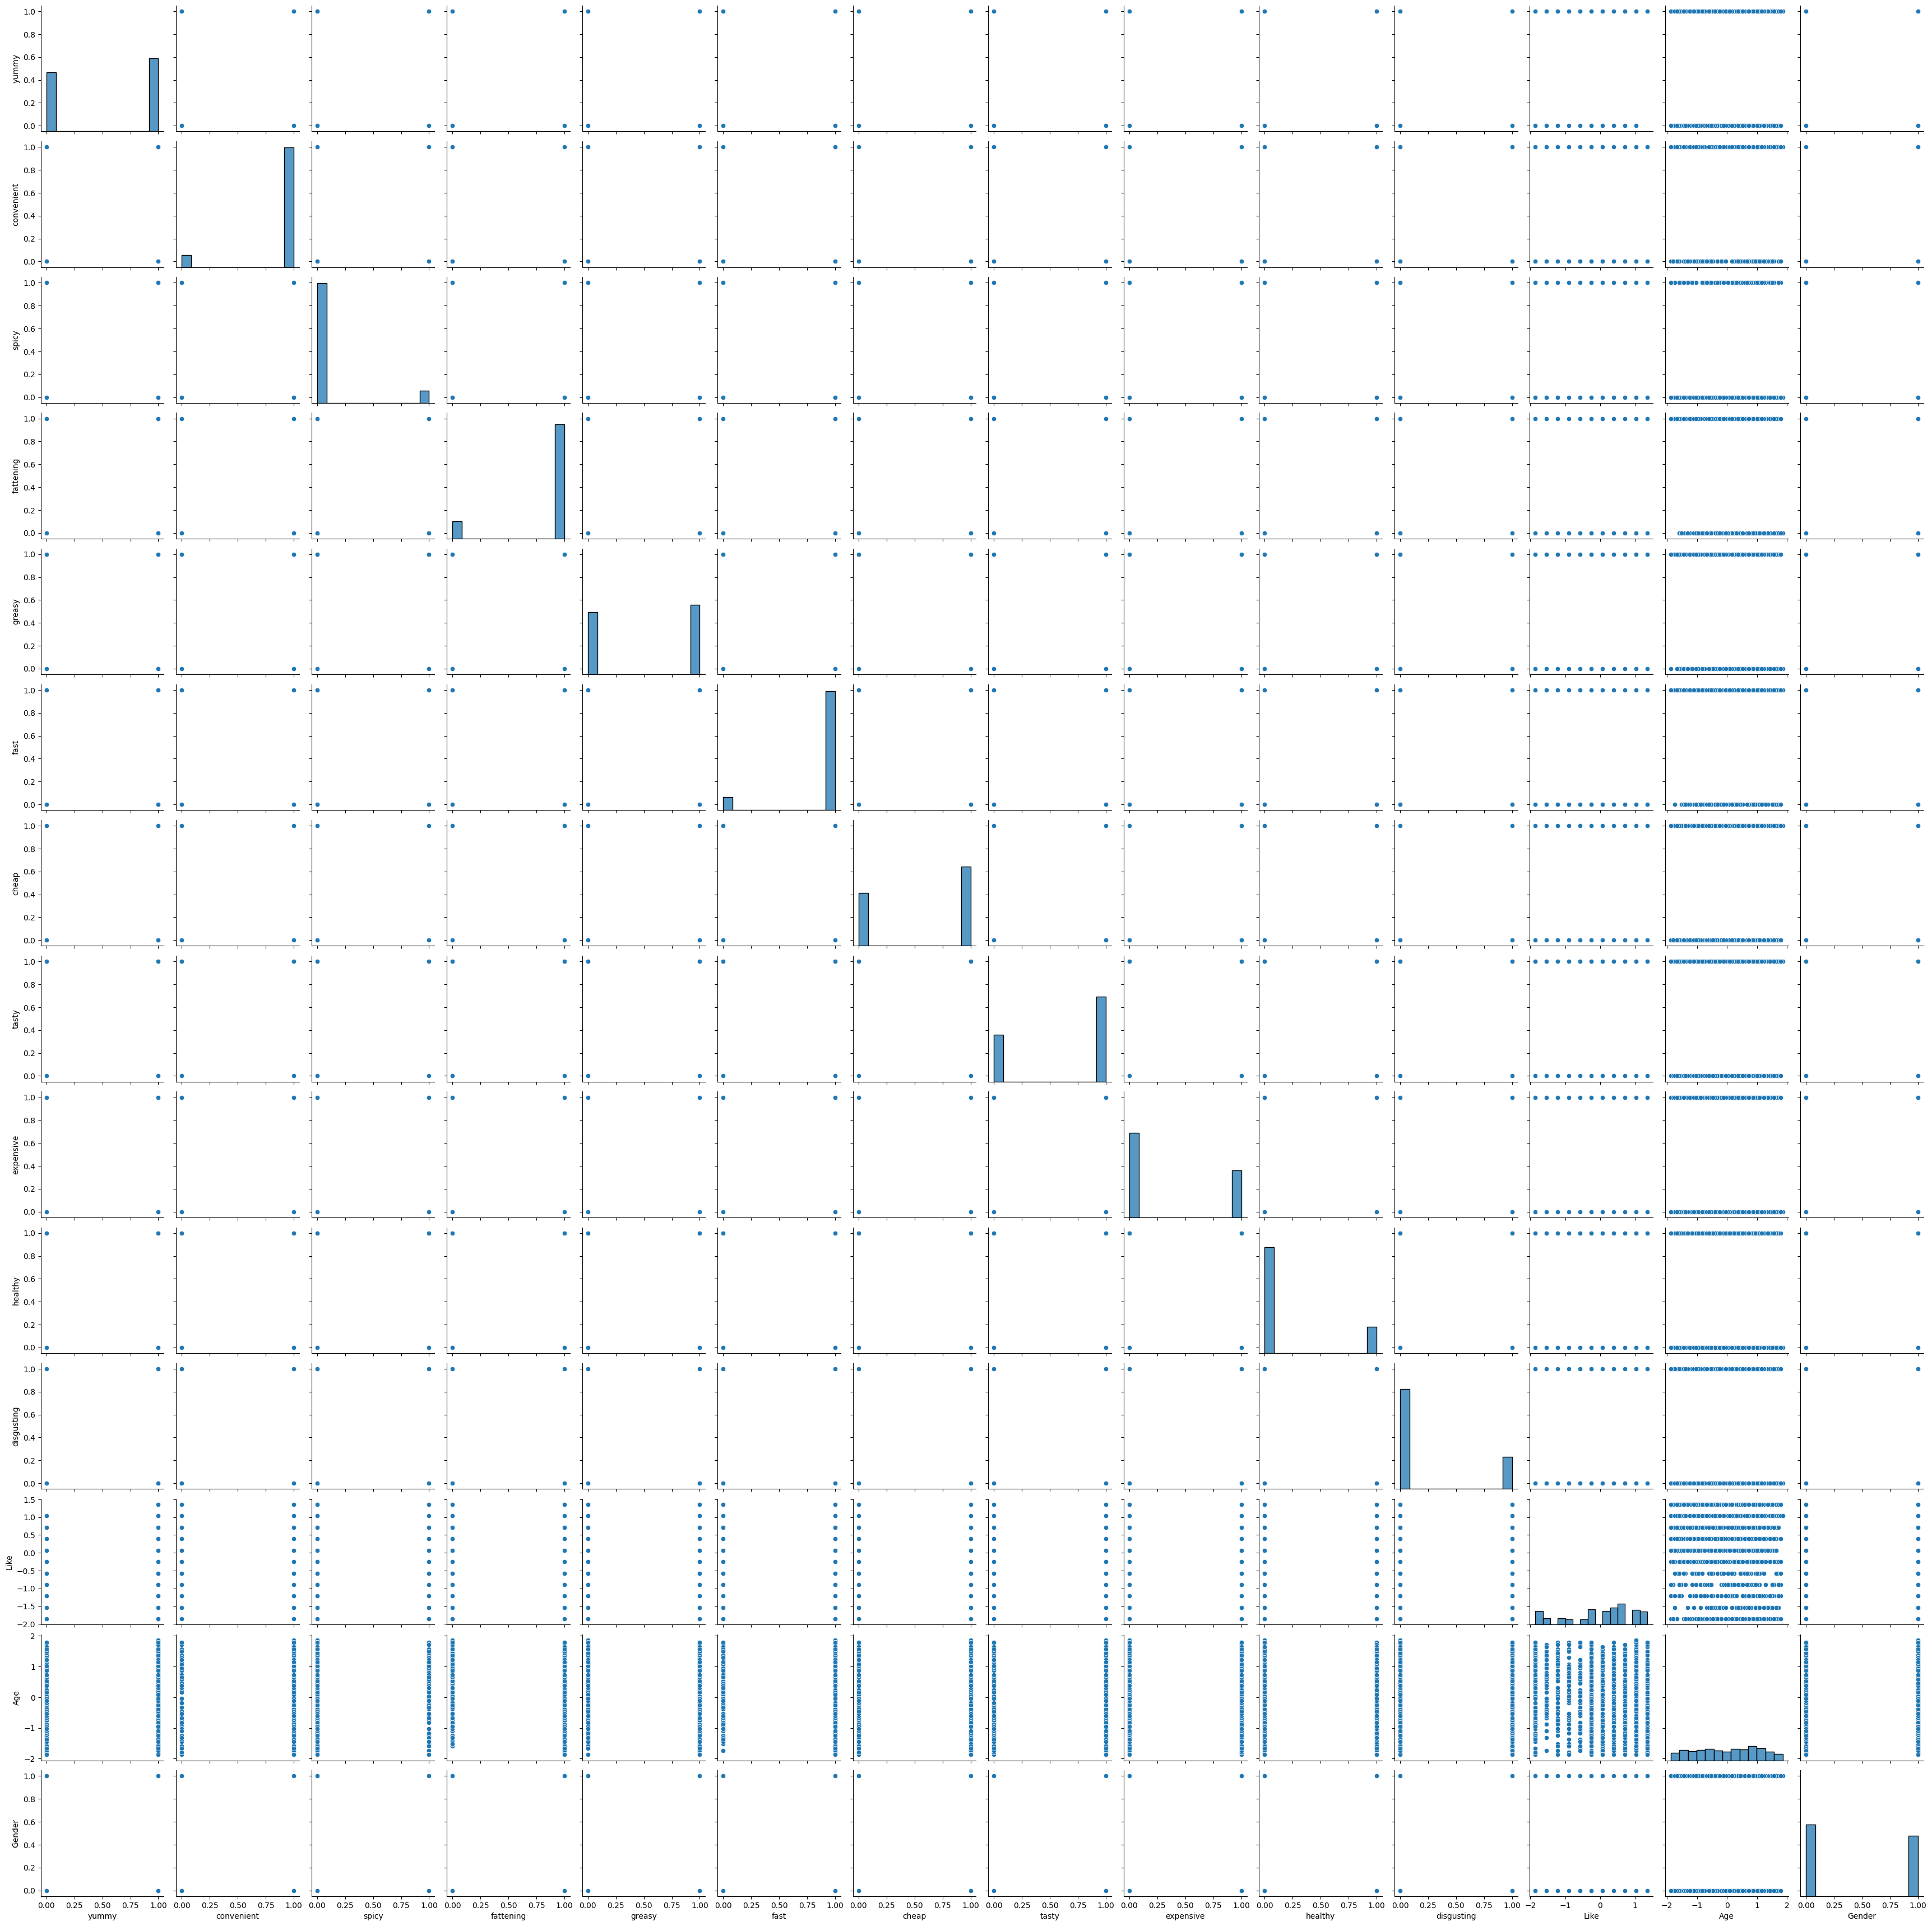

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
## Check point drop VisitFrequency for df datasets

In [ ]:
data = df.drop("VisitFrequency",axis = 1)

## **Elbow Method for K- Mean clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

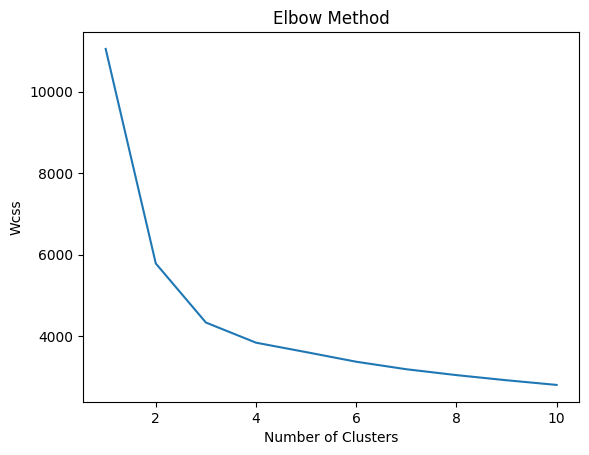

In [56]:
Wcss = []
for i in range(1,11):
  kmean = KMeans(i,random_state=42)
  kmean.fit(data)
  Wcss.append(kmean.inertia_)


plt.plot(range(1,11),Wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.show()


## **K-means Clusters**



In [ ]:
n_clusters = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit and predict clusters
data['Cluster'] = kmeans.fit_predict(data)

# Display cluster centers and labels
print(kmeans.cluster_centers_)
print(data['Cluster'].value_counts())


[[ 8.56884058e-01  9.67391304e-01  5.97826087e-02  9.11231884e-01
   5.99637681e-01  9.29347826e-01  6.06884058e-01  8.80434783e-01
   3.82246377e-01  2.21014493e-01  1.10507246e-01  6.05899124e-01
  -9.82993941e-01  4.61956522e-01 -5.10702591e-15]
 [ 4.49172577e-02  7.49408983e-01  8.98345154e-02  9.31442080e-01
   7.09219858e-01  8.10874704e-01  4.72813239e-01  1.32387707e-01
   4.86997636e-01  6.14657210e-02  6.40661939e-01 -1.29341024e+00
   3.69353687e-01  4.60992908e-01  2.00000000e+00]
 [ 6.50627615e-01  9.79079498e-01  1.35983264e-01  7.59414226e-01
   2.80334728e-01  9.45606695e-01  7.00836820e-01  8.24267782e-01
   2.15481172e-01  2.94979079e-01  4.39330544e-02  4.44887483e-01
   8.08318088e-01  4.49790795e-01  1.00000000e+00]]
Cluster
0    552
2    478
1    423
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## **Apply PCA for visualization**


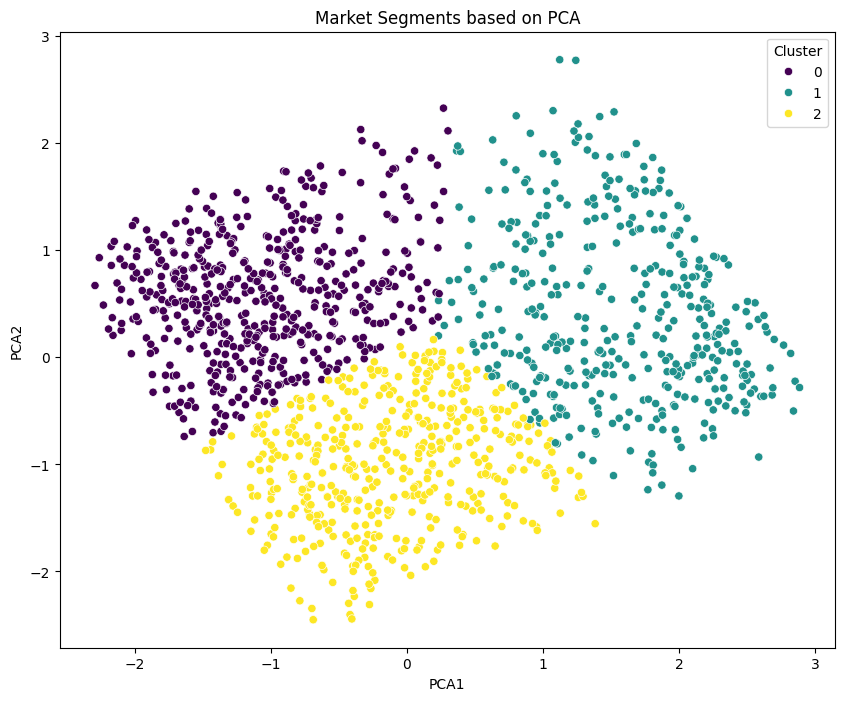

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop(columns='Cluster'))

# Convert to DataFrame
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Market Segments based on PCA')
plt.show()


## **GaussianMixture**

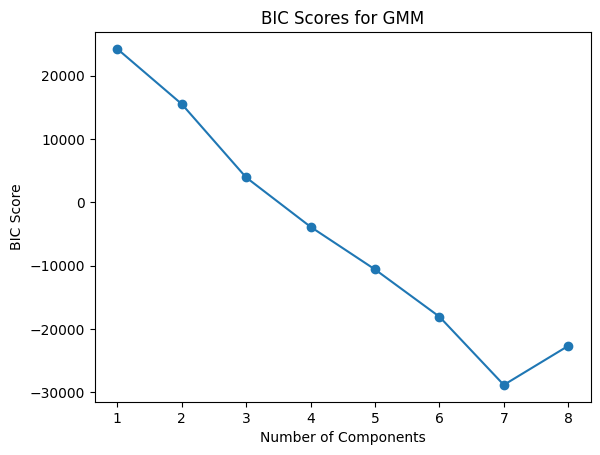

Best number of components: 7
Converged: True
Means: [[ 0.58490553  0.96226387  0.35849046  0.86792457  0.69811323  0.83018873
   0.26415094  0.4716981   1.          0.32075463  0.30188682  0.47729396
  -0.89727388  0.62264159  0.        ]
 [ 0.75331565  0.97612732  0.14058355  0.74535809  0.24137931  0.9469496
   0.69761273  1.          0.22281167  0.32625995  0.          0.51936204
   0.8125572   0.43236074  2.        ]
 [ 0.0443746   0.73097931  0.          0.94850565  0.71005102  0.80031839
   0.46577736  0.10834984  0.49647649  0.          0.66028989 -1.29817238
   0.31500247  0.45714921  1.        ]
 [ 0.          0.84856795  0.60572037  0.82446129  0.70632539  0.86537069
   0.52253858  0.23442495  0.42042282  0.40381358  0.52027166 -1.26861759
   0.69975975  0.49075546  1.        ]
 [ 0.36666671  0.82222236  0.15555558  0.88888887  0.65555554  0.98888889
   0.76666675  0.5777778   0.12222208  0.13333336  0.16666663  0.18924808
  -1.09377388  0.54444438  0.        ]
 [ 1.         

In [33]:

# Fit GMM with different numbers of components (1 to 8)
bic_scores = []
n_components_range = range(1, 9)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(data)
    bic_scores.append(gmm.bic(data))

# Plot BIC scores to choose the best number of components
import matplotlib.pyplot as plt

plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores for GMM')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()

# Choose the model with the lowest BIC score
best_n_components = np.argmin(bic_scores) + 1
print(f"Best number of components: {best_n_components}")

# Fit the GMM model with the best number of components
gmm_best = GaussianMixture(n_components=best_n_components, covariance_type='full', random_state=42)
gmm_best.fit(data)

# Print out the parameters of the best model
print(f"Converged: {gmm_best.converged_}")
print(f"Means: {gmm_best.means_}")
print(f"Weights: {gmm_best.weights_}")


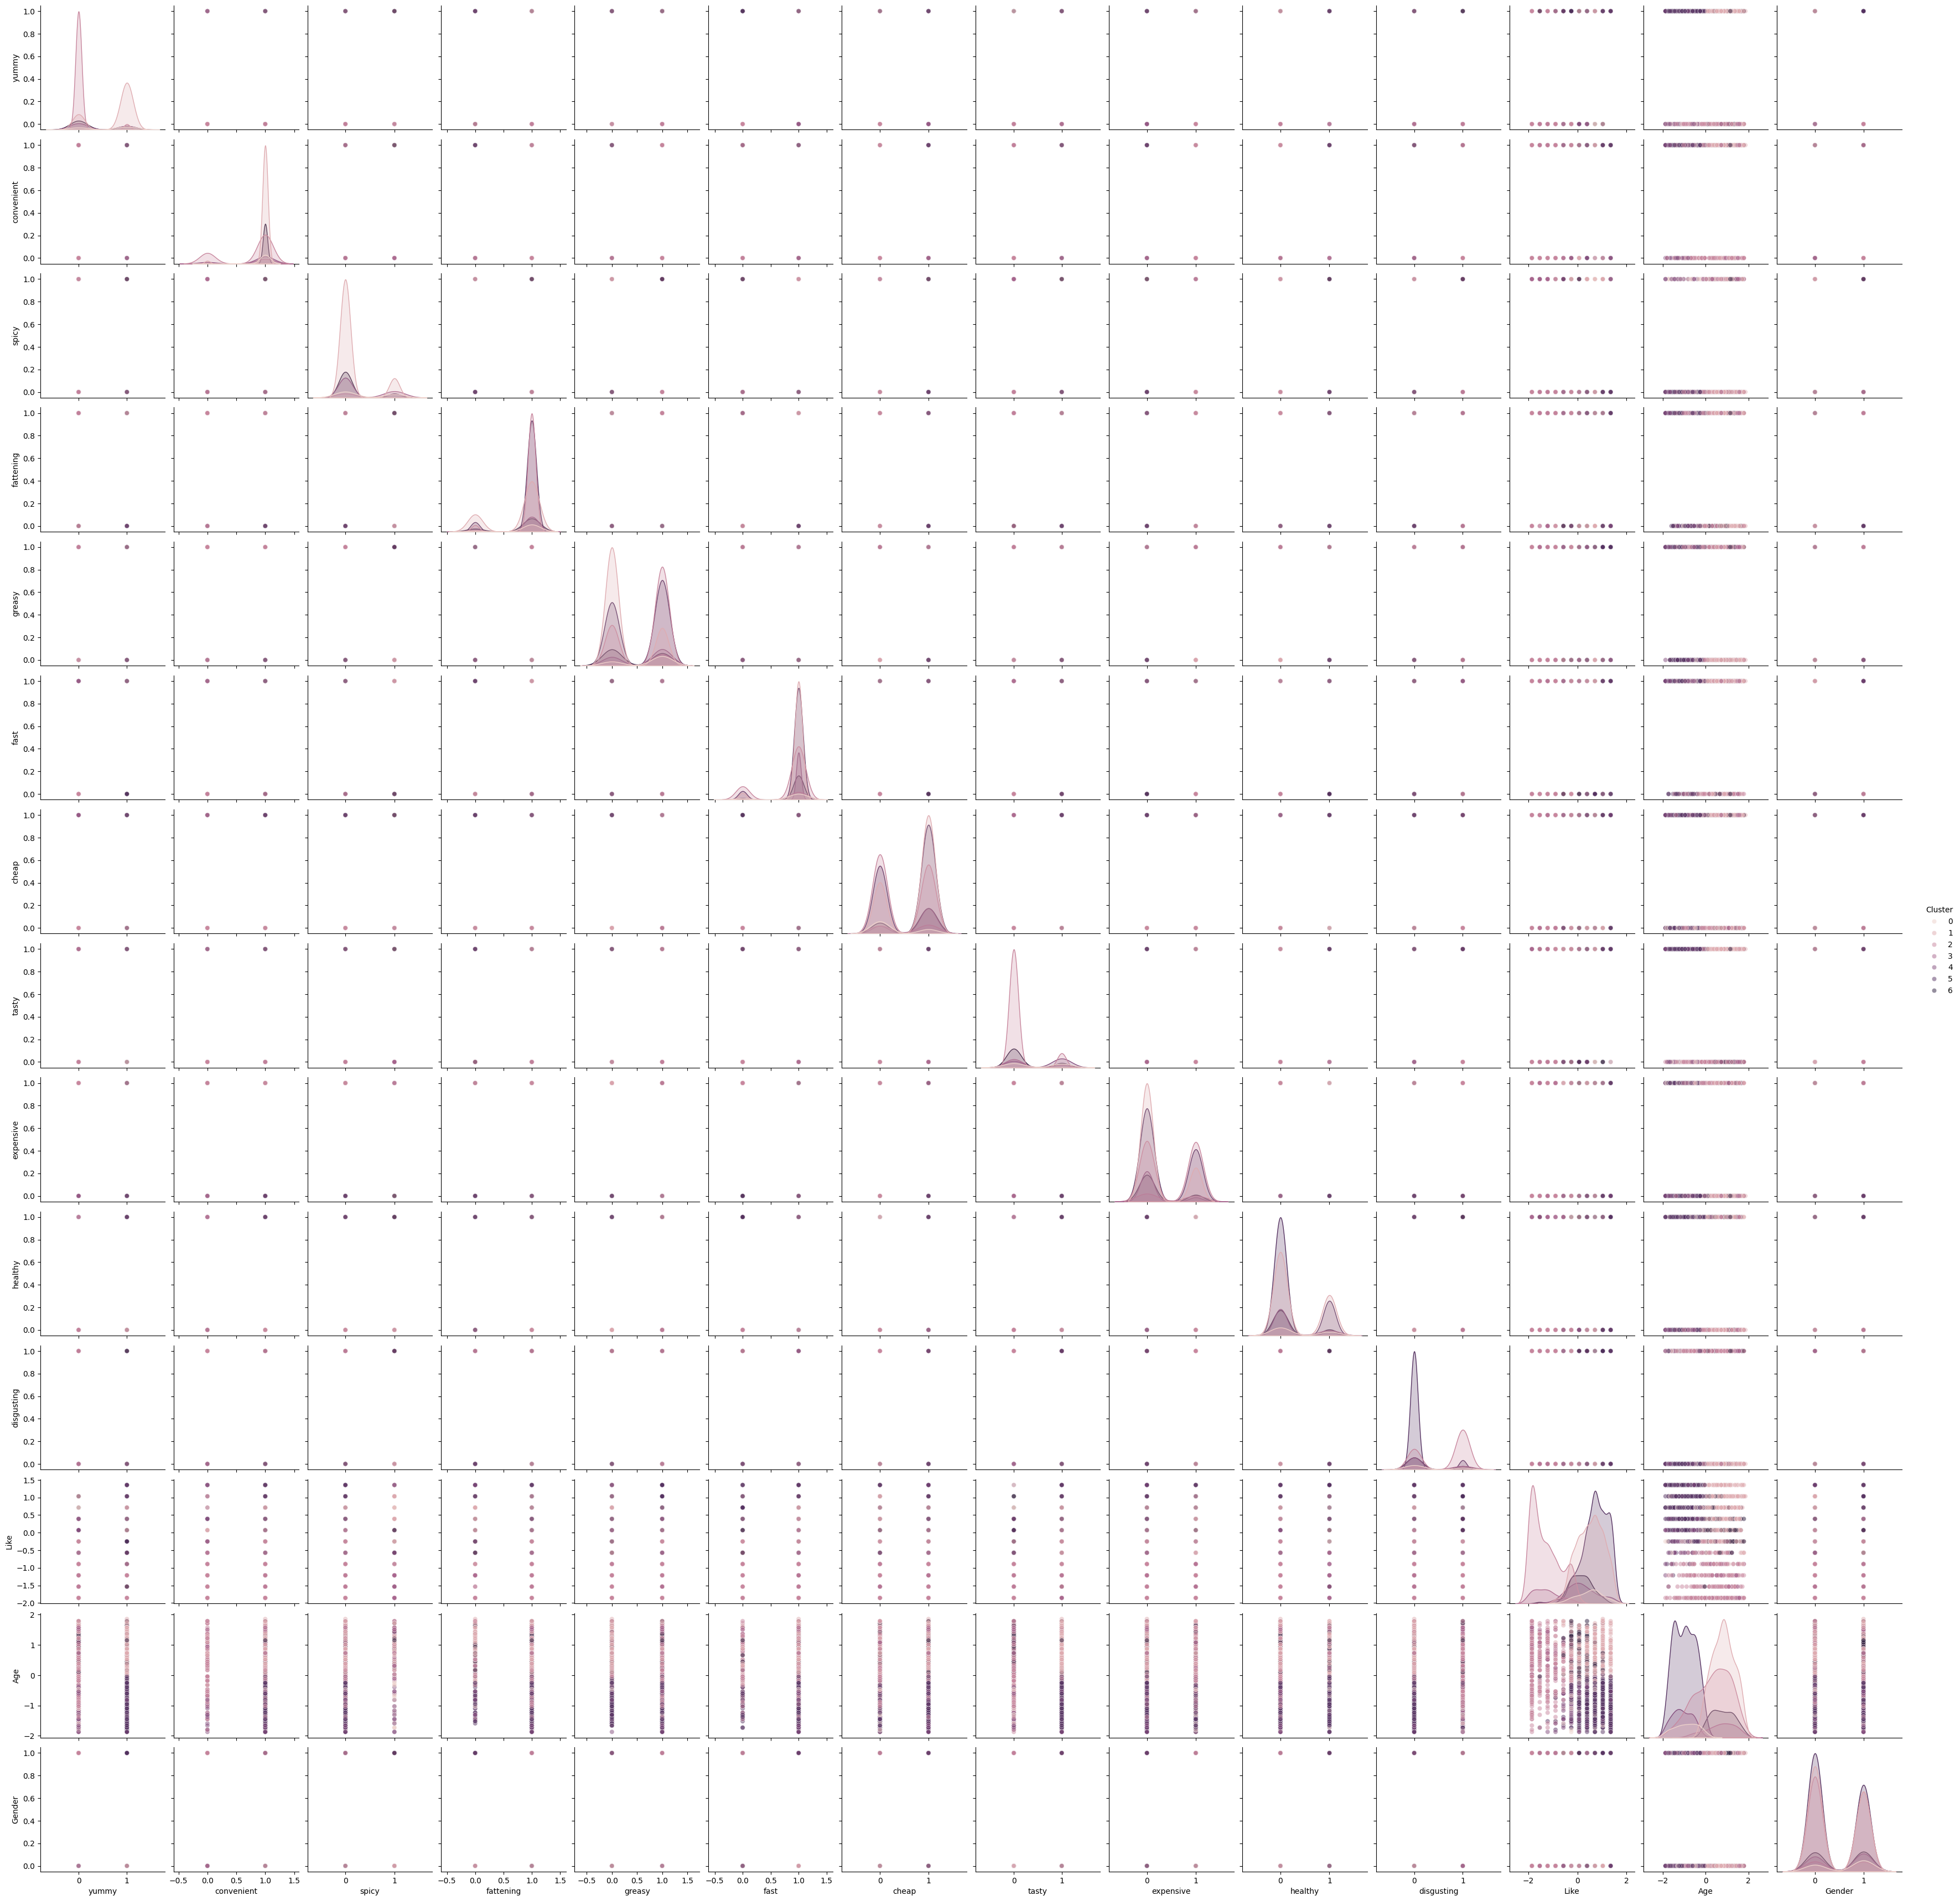

Cluster Centers: [[ 0.58490553  0.96226387  0.35849046  0.86792457  0.69811323  0.83018873
   0.26415094  0.4716981   1.          0.32075463  0.30188682  0.47729396
  -0.89727388  0.62264159  0.        ]
 [ 0.75331565  0.97612732  0.14058355  0.74535809  0.24137931  0.9469496
   0.69761273  1.          0.22281167  0.32625995  0.          0.51936204
   0.8125572   0.43236074  2.        ]
 [ 0.0443746   0.73097931  0.          0.94850565  0.71005102  0.80031839
   0.46577736  0.10834984  0.49647649  0.          0.66028989 -1.29817238
   0.31500247  0.45714921  1.        ]
 [ 0.          0.84856795  0.60572037  0.82446129  0.70632539  0.86537069
   0.52253858  0.23442495  0.42042282  0.40381358  0.52027166 -1.26861759
   0.69975975  0.49075546  1.        ]
 [ 0.36666671  0.82222236  0.15555558  0.88888887  0.65555554  0.98888889
   0.76666675  0.5777778   0.12222208  0.13333336  0.16666663  0.18924808
  -1.09377388  0.54444438  0.        ]
 [ 1.          1.          0.          0.92176039

In [34]:
# Assign clusters
clusters = gmm_best.predict(data)
data['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(data, hue='Cluster', plot_kws={'alpha': 0.5})
plt.show()

# Analyze the clusters
cluster_centers = gmm_best.means_
print(f"Cluster Centers: {cluster_centers}")


# **BinaryDistributions**

In [35]:

# Assuming df_encoded is the DataFrame from your previous data
winter_activities = data[['yummy', 'healthy']]

# Convert Yes/No to 1/0
winter_activities = winter_activities.replace({'Yes': 1, 'No': 0})

# Display the contingency table
contingency_table = pd.crosstab(winter_activities['yummy'], winter_activities['healthy'])
print(contingency_table)


healthy    0    1
yummy            
0        592   58
1        572  231


Step 2: Calculate the Marginal Probabilities


In [36]:
# Calculate the column means (marginal probabilities)
p = winter_activities.mean()
print("Marginal probabilities:")
print(p)

# Calculate the product of probabilities
product_prob = round(np.prod(p) * 100)
print(f"Product of probabilities multiplied by 100: {product_prob}")


Marginal probabilities:
yummy      0.552650
healthy    0.198899
dtype: float64
Product of probabilities multiplied by 100: 11


Step 3: Define Expected Frequencies Function


In [37]:
# Number of rows in the dataset
n = len(winter_activities)

def expected(p):
    res = np.outer([1 - p[0], p[0]], [1 - p[1], p[1]])
    return pd.DataFrame(res, index=["0", "1"], columns=["0", "1"])

expected_freq = round(n * expected(p))
print("Expected frequencies:")
print(expected_freq)


Expected frequencies:
       0      1
0  521.0  129.0
1  643.0  160.0


<ipython-input-37-b6dab73682c1>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res = np.outer([1 - p[0], p[0]], [1 - p[1], p[1]])


Step 4: Fit a Binary Clustering Model


In [38]:
from sklearn.mixture import GaussianMixture

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(winter_activities)

# Predict clusters
winter_activities['Cluster'] = gmm.predict(winter_activities)

# Cluster probabilities
cluster_probs = gmm.predict_proba(winter_activities[['yummy', 'healthy']])
print("Cluster probabilities:")
print(cluster_probs)


Cluster probabilities:
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


##  **Model Selection and Parameter Estimation**


In [40]:
from sklearn.metrics import silhouette_score

# Testing different numbers of clusters (1 to 4) to find the best model
scores = []
models = []
for k in range(1, 5):
    gmm_k = GaussianMixture(n_components=k, random_state=42)
    gmm_k.fit(winter_activities[['yummy', 'healthy']])
    labels = gmm_k.predict(winter_activities[['yummy', 'healthy']])

    if len(set(labels)) > 1:
        score = silhouette_score(winter_activities[['yummy', 'healthy']], labels)
    else:
        score = -1  # Assign a low score for single-cluster solutions

    scores.append(score)
    models.append(gmm_k)

# Select the best model based on the highest silhouette score
best_model_idx = np.argmax(scores)
best_model = models[best_model_idx]
print(f"Best model has {best_model_idx + 1} components")

# Parameters of the best model
parameters = best_model.means_
print("Parameters of the best model:")
print(parameters)

# Prior probabilities (mixing weights) of the best model
pi = best_model.weights_
print("Mixing weights (priors):")
print(pi)

# Expected frequencies for each component
expected_component_1 = expected(parameters[0])
expected_component_2 = expected(parameters[1])

# Combine the components weighted by their priors
combined_expected = pi[0] * expected_component_1 + pi[1] * expected_component_2
rounded_combined = round(n * combined_expected)
print("Combined expected frequencies (rounded):")
print(rounded_combined)


Best model has 4 components
Parameters of the best model:
[[1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]]
Mixing weights (priors):
[0.15898142 0.4074329  0.39366827 0.03991741]
Combined expected frequencies (rounded):
       0      1
0  592.0    0.0
1    0.0  231.0


  # **Step 6: Profiling Segments**



In [42]:
df1 = data.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)

models = {}
for k in range(3, 9):
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(X_scaled)
    models[k] = gmm

for k, model in models.items():
    df[f'Cluster_k{k}'] = model.predict(X_scaled)

model_k3 = models[3]
model_k6 = models[6]

df1['Cluster_k3'] = model_k3.predict(X_scaled)
df1['Cluster_k6'] = model_k6.predict(X_scaled)


In [43]:
# Function to calculate segment-wise likelihood
def segment_wise_likelihood(X, model):
    return model.score_samples(X).sum()

# Calculate segment-wise likelihood for k = 3 and k = 6
likelihood_k3 = segment_wise_likelihood(X_scaled, model_k3)
likelihood_k6 = segment_wise_likelihood(X_scaled, model_k6)

print(f"Segment-wise likelihood for k=3: {likelihood_k3}")
print(f"Segment-wise likelihood for k=6: {likelihood_k6}")


Segment-wise likelihood for k=3: -2282.472814978347
Segment-wise likelihood for k=6: 11994.92909927836


Columns in DataFrame: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'Gender',
       'Cluster'],
      dtype='object')
One or more columns not found in the DataFrame. Please check your data.


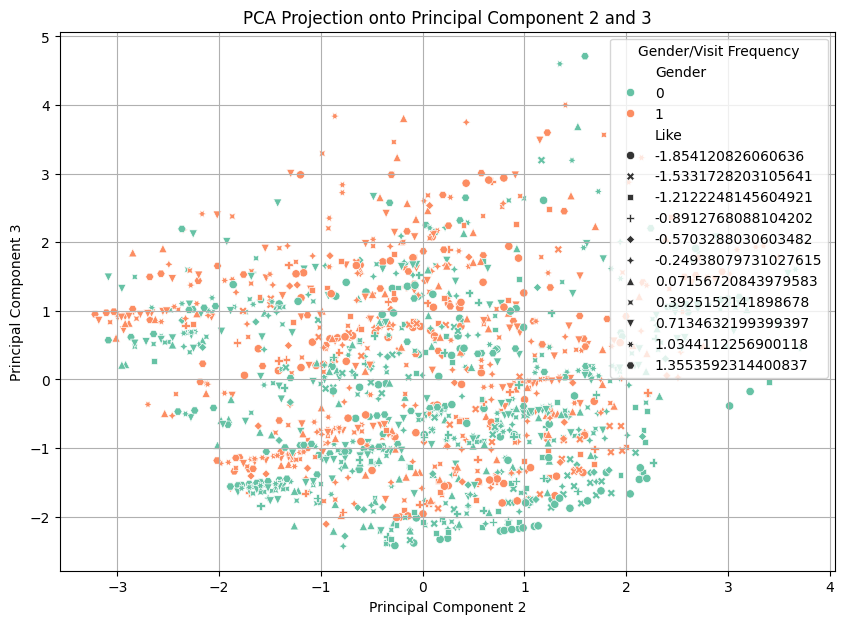

In [48]:
print("Columns in DataFrame:", df.columns)

if 'VisitFrequency' in df.columns and 'Gender' in df.columns:
    df_encoded = pd.get_dummies(df, columns=['VisitFrequency', 'Gender'], drop_first=True)
else:
    print("One or more columns not found in the DataFrame. Please check your data.")

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC2', y='PC3', data=pca_df, hue=df['Gender'], style=df['Like'], palette='Set2')

# Adding plot details
plt.title('PCA Projection onto Principal Component 2 and 3')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(loc='best', title='Gender/Visit Frequency')
plt.grid(True)
plt.show()


 # **Step 7: Describing Segments**


In [50]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(data)

# Encoding categorical variables
le_gender = LabelEncoder()
le_visit = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
# df['VisitFrequency'] = le_visit.fit_transform(df['VisitFrequency'])

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Segment'] = kmeans.fit_predict(df.drop(['Age', 'Like'], axis=1))

# Displaying the clusters
print(df['Segment'].value_counts())


Segment
1    850
0    603
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 #  **Step 8: Selecting the Target Segment(s)**


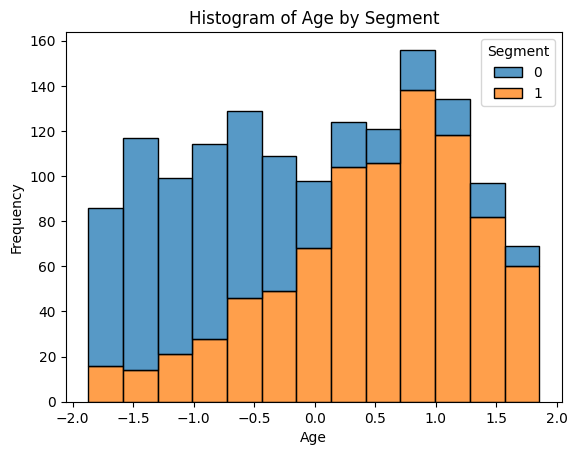

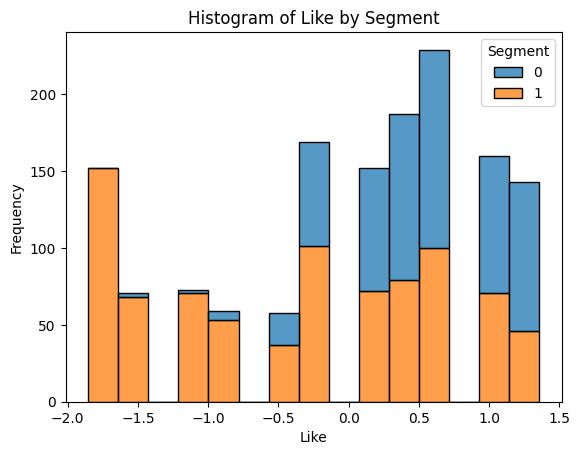

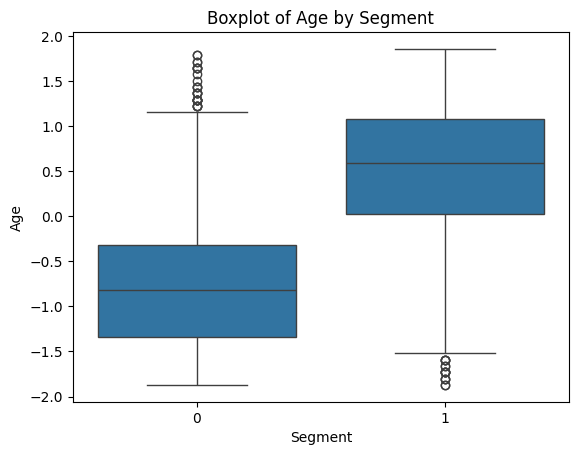

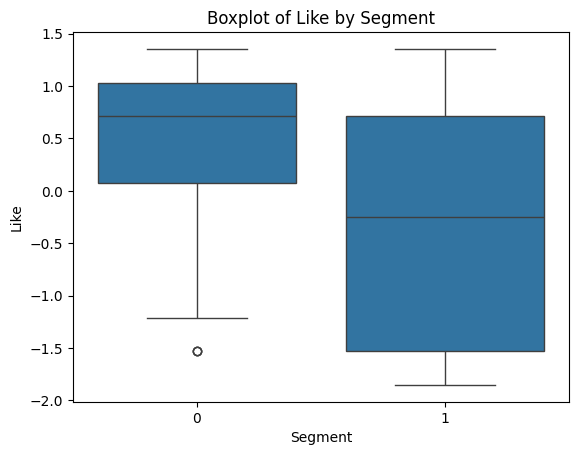

In [51]:
# Histograms
sns.histplot(data=df, x='Age', hue='Segment', multiple='stack')
plt.title('Histogram of Age by Segment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=df, x='Like', hue='Segment', multiple='stack')
plt.title('Histogram of Like by Segment')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.show()

# Boxplots
sns.boxplot(x='Segment', y='Age', data=df)
plt.title('Boxplot of Age by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()

sns.boxplot(x='Segment', y='Like', data=df)
plt.title('Boxplot of Like by Segment')
plt.xlabel('Segment')
plt.ylabel('Like')
plt.show()


#  **Step 9: Customising the Marketing Mix**

In [52]:
# Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-Square Test: chi2={chi2}, p-value={p}')


Chi-Square Test: chi2=87.53671782000107, p-value=8.272965049700802e-21


                sum_sq      df           F        PR(>F)
C(Segment)   294.62188     1.0  369.047327  1.845385e-73
Residual    1158.37812  1451.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.9139   0.0 -1.0072 -0.8206   True
---------------------------------------------------


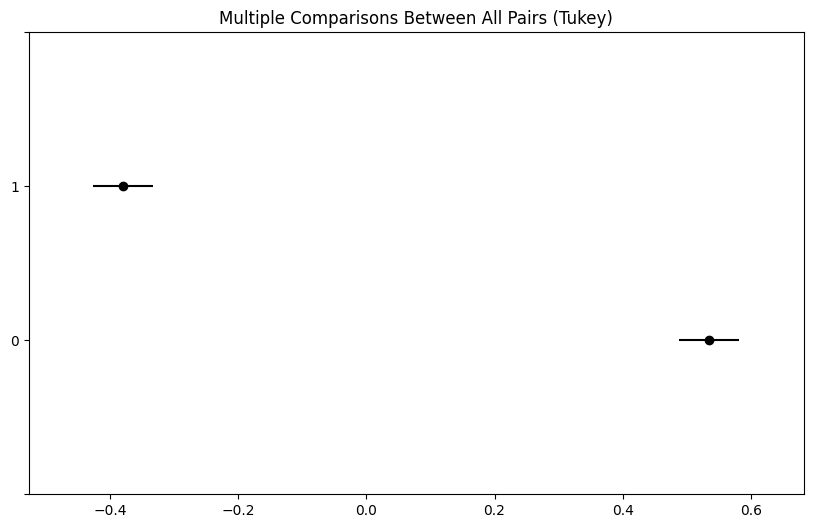

In [53]:
# ANOVA
aov = sm.formula.ols('Like ~ C(Segment)', data=df).fit()
anova_table = sm.stats.anova_lm(aov, typ=2)
print(anova_table)

# Tukey's HSD Test
tukey = pairwise_tukeyhsd(endog=df['Like'], groups=df['Segment'], alpha=0.05)
print(tukey)
tukey.plot_simultaneous()
plt.show()


In [54]:
# Linear Regression
import statsmodels.formula.api as smf

# Model with Segment as categorical
lm_model = smf.ols('Age ~ C(Segment)', data=df).fit()
print(lm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     728.7
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.19e-130
Time:                        20:51:48   Log-Likelihood:                -1766.1
No. Observations:                1453   AIC:                             3536.
Df Residuals:                    1451   BIC:                             3547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6865      0.033    -